# Data Exploration Script

Author: Clemens Jochum

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import matplotlib.dates as mdates

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams['figure.dpi'] = 250

#'font.size': 10, 'savefig.dpi': 72, 'figure.subplot.bottom': 0.125

### Import Datasets

Use a random dataset for each type of synthetic data.

In [151]:
path_to_data_raw = '/home/clemi/s2ds/code/Aug20_Epri/data/raw'

list_data_keys = ['basic', 'soil', 'soil_weather']
#list_data_keys = ['basic', 'soil', 'weather', 'soil_weather']
list_index_random = np.random.randint(50, size=len(list_data_keys))

dict_index_dataset = {}
for (data_key, dataset_index) in zip(list_data_keys, list_index_random):
    dict_index_dataset[data_key] = dataset_index
    
dict_data_paths = {}
for data_key in list_data_keys:
    dict_data_paths[data_key] = '{0:s}/synthetic_{1:s}/synthetic_{1:s}_{2:s}.csv'.format(path_to_data_raw, data_key, str(dict_index_dataset[data_key]).zfill(3))

In [152]:
dict_df = {}
for data_key in list_data_keys:
    dict_df[data_key] = {}
    dict_df[data_key]['T'] = pd.read_csv(dict_data_paths[data_key])
    dict_df[data_key]['T'] = dict_df[data_key]['T'].rename(columns={'Unnamed: 0': 'dt'})
    dict_df[data_key]['T']['dt'] = pd.to_datetime(dict_df[data_key]['T']['dt'])
    dict_df[data_key]['T']['dt'] = dict_df[data_key]['T']['dt'].dt.tz_localize(None)
    dict_df[data_key]['T'] = dict_df[data_key]['T'].rename(columns={'dt' : 'datetime'})
    dict_df[data_key]['T'] = dict_df[data_key]['T'].set_index('datetime')

In [153]:
dict_df['basic']['T'].head()

,Power,POA,Tamb,Wind,Degradation_rate_per_yr,soiling
datetime,,,,,,
2015-01-01 00:00:00,-1.0,0.0,5.1,0.0,-0.00699,1
2015-01-01 00:01:00,-1.0,0.0,5.1,0.0,-0.00699,1
2015-01-01 00:02:00,-1.0,0.0,5.1,0.0,-0.00699,1
2015-01-01 00:03:00,-1.0,0.0,5.1,0.0,-0.00699,1
2015-01-01 00:04:00,-1.0,0.0,5.1,0.0,-0.00699,1


### Resample Datasets

Downsample minutes ('T') to hours ('H'), days ('D'), weeks ('W'), months ('MS'), and years ('AS') using mean.

In [154]:
list_resample_rules = ['H', 'D', 'W', 'MS', 'AS']

dict_label_resample_rules = {
    'T' : 'minute',
    'H' : 'hour',
    'D' : 'day',
    'W' : 'week',
    'MS' : 'month',
    'AS' : 'year',
}

dict_timeunits_per_year = {
    'MS' : 12,
    'W' : 52,
    'D' : 365,
    'H' : 24 * 365,
    'T' : 60 * 24 * 365,
}

In [155]:
for data_key in list_data_keys:
    for resample_rule in list_resample_rules:
        dict_df[data_key][resample_rule] = dict_df[data_key]['T'].resample(resample_rule).mean()

### Plot Individual Data Attributes

In [308]:
def save_plot_all_features(df, tmin = 0, tmax = -1, title = '', data_title = ''):
    
    num_subplots = df.keys().shape[0]
    axarr = df[tmin:tmax].plot(subplots=True, layout=(num_subplots, 1))
    
    for key,i in zip(df.keys(), range(num_subplots)):
        axarr[i][0].set_ylim([df[key][tmin:tmax].min() - 0.05 * df[key][tmin:tmax].max(), 1.05 * df[key][tmin:tmax].max()])

    fig = plt.gcf()
    fig.set_size_inches(10, 15, forward = True)
    axarr[-1][0].set_xlabel('Time')
    
    #plt.tight_layout()
    #plt.rcParams.update({'font.size': 36})
    
    
    fig.suptitle(title, size = 24)
    fig.savefig('plot_{:s}_blabla.pdf'.format(''), dpi = 250)
    plt.close()
    
    return None

In [309]:
for data_key in list_data_keys:
    
    for resample_key in list_resample_rules:
        
        dict_df[data_key][resample_key]


save_plot_all_features(dict_df['soil_weather']['AS'], 0, 24 * 31)


In [325]:
def save_plot_all_features(df, tmin = 0, tmax = -1, title = ''):
    
    num_subplots = df.keys().shape[0]
    fig, axarr = plt.subplots(num_subplots, 1, sharex=True)
    
    plt.ioff()
    plt.style.use('seaborn')
    fig.set_size_inches(10, 10, forward = True)
    list_colours = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    
    print(df.dtypes)
    print(df.index[0])

    fig.suptitle(title, size = 24)
    for i, key in zip(range(num_subplots), df.keys()):
        axarr[i].plot(df.index.values, df[key].values, color = list_colours[i], label = key)
        #axarr[i].set_xlim([df.index[tmin], df.index[tmax]])    
        #axarr[i].set_ylim([df[key][tmin:tmax].min() - 0.05 * df[key][tmin:tmax].max(), 1.05 * df[key][tmin:tmax].max()])    
    
        axarr[i].legend()
    
    #plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    #plt.rc('axes', titlesize=36)
    #plt.rc('axes', labelsize=36)
    #plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    #plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    #plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    #plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    
    
    
    #plt.xticks(rotation='vertical')
    #plt.gcf().autofmt_xdate()
    
    #plt.tight_layout()
    fig.savefig('plot_{:s}.pdf'.format(title), dpi = 250)
    #plt.show()
    plt.close()
    
    
    
    #plt.tight_layout()
    #plt.savefig('name.pdf', dpi=300)
    #return None

In [326]:
save_plot_all_features(dict_df['soil_weather']['W'], 0, 52, title='soil_weather')
#save_plot_all_features(dict_df['soil']['MS'])

Power                      float64
POA                        float64
Tamb                       float64
Wind                       float64
Degradation_rate_per_yr    float64
soiling                    float64
dtype: object
2015-01-04 00:00:00


### Fourier Analysis of the Power Signal

In [41]:
def get_fft_freq_and_ampl(timeseries, dt = 1.0):
    fft_freq = np.fft.fftfreq(timeseries.shape[0], d=dt)
    fft_ampl = np.fft.fft(timeseries)
    fft_ampl_abs_real = np.abs(np.real(fft_ampl))
    fft_ampl_abs_real_norm = fft_ampl_abs_real / np.max(fft_ampl_abs_real) 
    return (fft_freq, fft_ampl_abs_real_norm)

In [42]:
def plot_fft_wo_show(fft_freq, fft_ampl, ax, timeunit):
    ax.stem(fft_freq, fft_ampl, label = 'FFT of Power Signal', basefmt = '')
    ax.set_xlim([0., np.max(fft_freq)])
    ax.set_ylim([0., np.max(fft_ampl[1:]) * 1.1])
    ax.set_xlabel('Frequency [per {:s}]'.format(timeunit))
    ax.set_ylabel('Normalised Amplitude')
    ax.legend()

In [61]:
data_key = 'basic'
resample_key = 'D'
timeseries = dict_df[data_key][resample_key]['Power'].values

In [62]:
fft_freq, fft_ampl = get_fft_freq_and_ampl(timeseries)

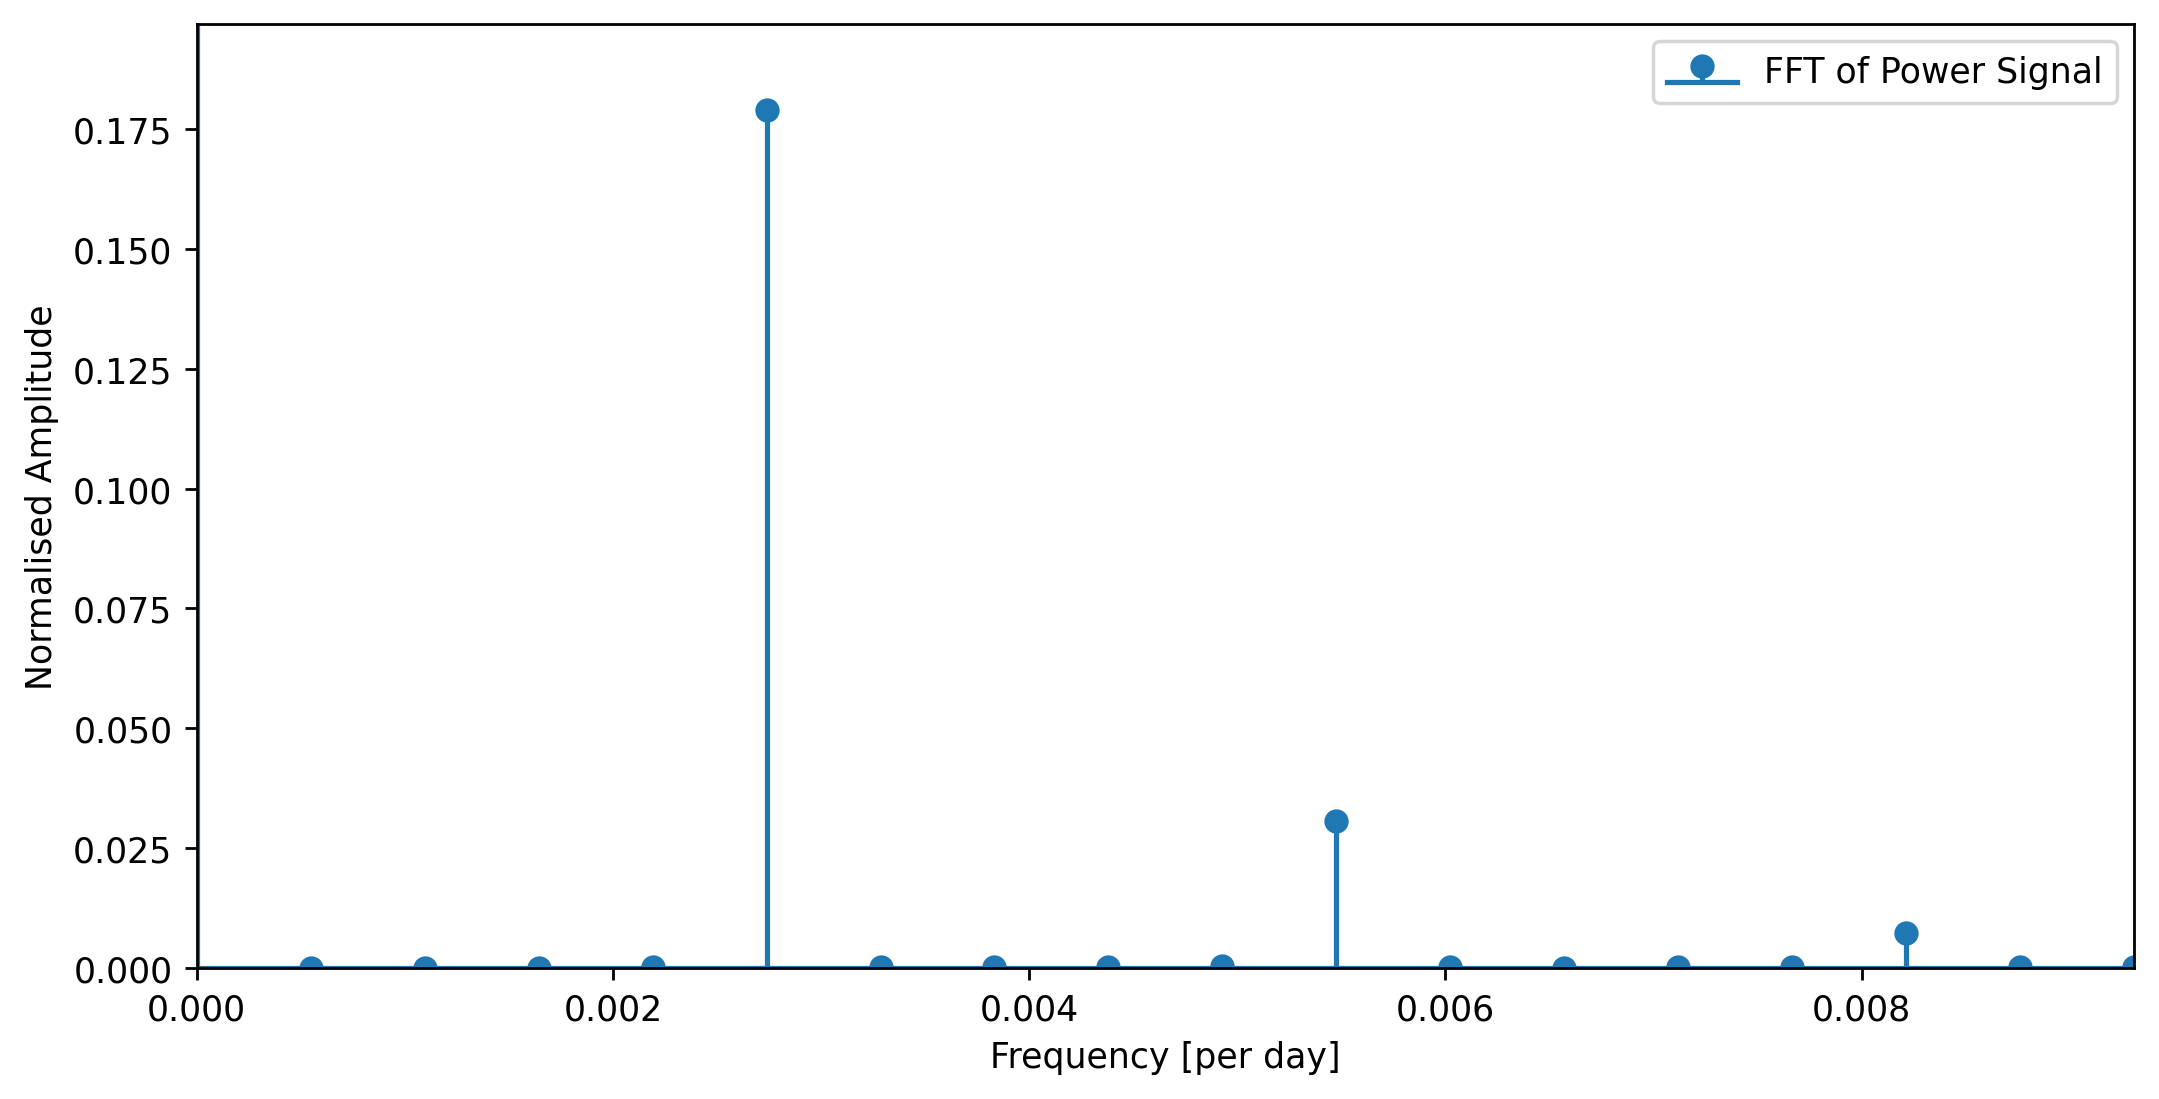

In [63]:
fig, ax = plt.subplots()
plot_fft_wo_show(fft_freq[:fft_freq.shape[0] // 100], fft_ampl[:fft_freq.shape[0] // 100], ax, dict_label_resample_rules[resample_key])

In [77]:
y = np.fft.fft(timeseries)
y[fft_ampl >= 0.1] = 0.
y = np.real(np.fft.ifft(y))
x = np.arange(0., y.shape[0], 1.)

In [84]:
print(np.stack((x, y), axis = 1))

[[ 0.00000000e+00 -3.31379419e+01]
 [ 1.00000000e+00 -3.24855762e+01]
 [ 2.00000000e+00 -3.17835288e+01]
 ...
 [ 1.82300000e+03 -4.92225179e+01]
 [ 1.82400000e+03 -4.88412337e+01]
 [ 1.82500000e+03 -4.84110384e+01]]


In [91]:
from sklearn.linear_model import LinearRegression


reg = LinearRegression().fit(np.stack((x, y), axis = 1), y)
print(reg.coef_, reg.intercept_)

#reg.predict(0)





#plt.plot(np.fft.ifft(x))
#plt.show()


#minutes_per_day = 60 * 24
#print(1. / minutes_per_day)
#print(1. / dict_timeunits_per_year['T'])
#print(1. / 0.005)
#print(1. / 0.0007 / 60.)



#for n in range(12):
#    plt.axvline(n/24., color='k', zorder=-1, linewidth = 1)
#for n in range(12):
#    plt.axvline(n/365., color='k', zorder=-1, linewidth = 1)
#plt.xlim([0., 12 * 1. / dict_timeunits_per_year['H']])





#plt.plot()
#plt.plot(np.fft.ifft(np.fft.fft(dict_df['soil']['W']['Power'])))
#plt.show()

#

#plt.axhline(0, color='k', zorder=-1)
#plt.axvline(1./12., color='k', zorder=-1, linewidth = 1)
#
#plt.show()





#print(np.abs(np.real(np.fft.fft(timeseries))))
#print(np.fft.fftfreq(timeseries.shape[0], d=1.0))

#plt.plot(np.fft.fftfreq(timeseries.shape[0], d=1.0), )
#plt.show()

[-7.06979701e-18  1.00000000e+00] 1.882859153054839e-15


Help on DecomposeResult in module statsmodels.tsa.seasonal object:

class DecomposeResult(builtins.object)
 |  DecomposeResult(observed, seasonal, trend, resid, weights=None)
 |  
 |  Results class for seasonal decompositions
 |  
 |  Parameters
 |  ----------
 |  observed : array_like
 |      The data series that has been decomposed.
 |  seasonal : array_like
 |      The seasonal component of the data series.
 |  trend : array_like
 |      The trend component of the data series.
 |  resid : array_like
 |      The residual component of the data series.
 |  weights : array_like, optional
 |      The weights used to reduce outlier influence.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, observed, seasonal, trend, resid, weights=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  plot(self, observed=True, seasonal=True, trend=True, resid=True, weights=False)
 |      Plot estimated components
 |      
 |      Parameters
 |      ----------
 |      

<AxesSubplot:xlabel='datetime'>

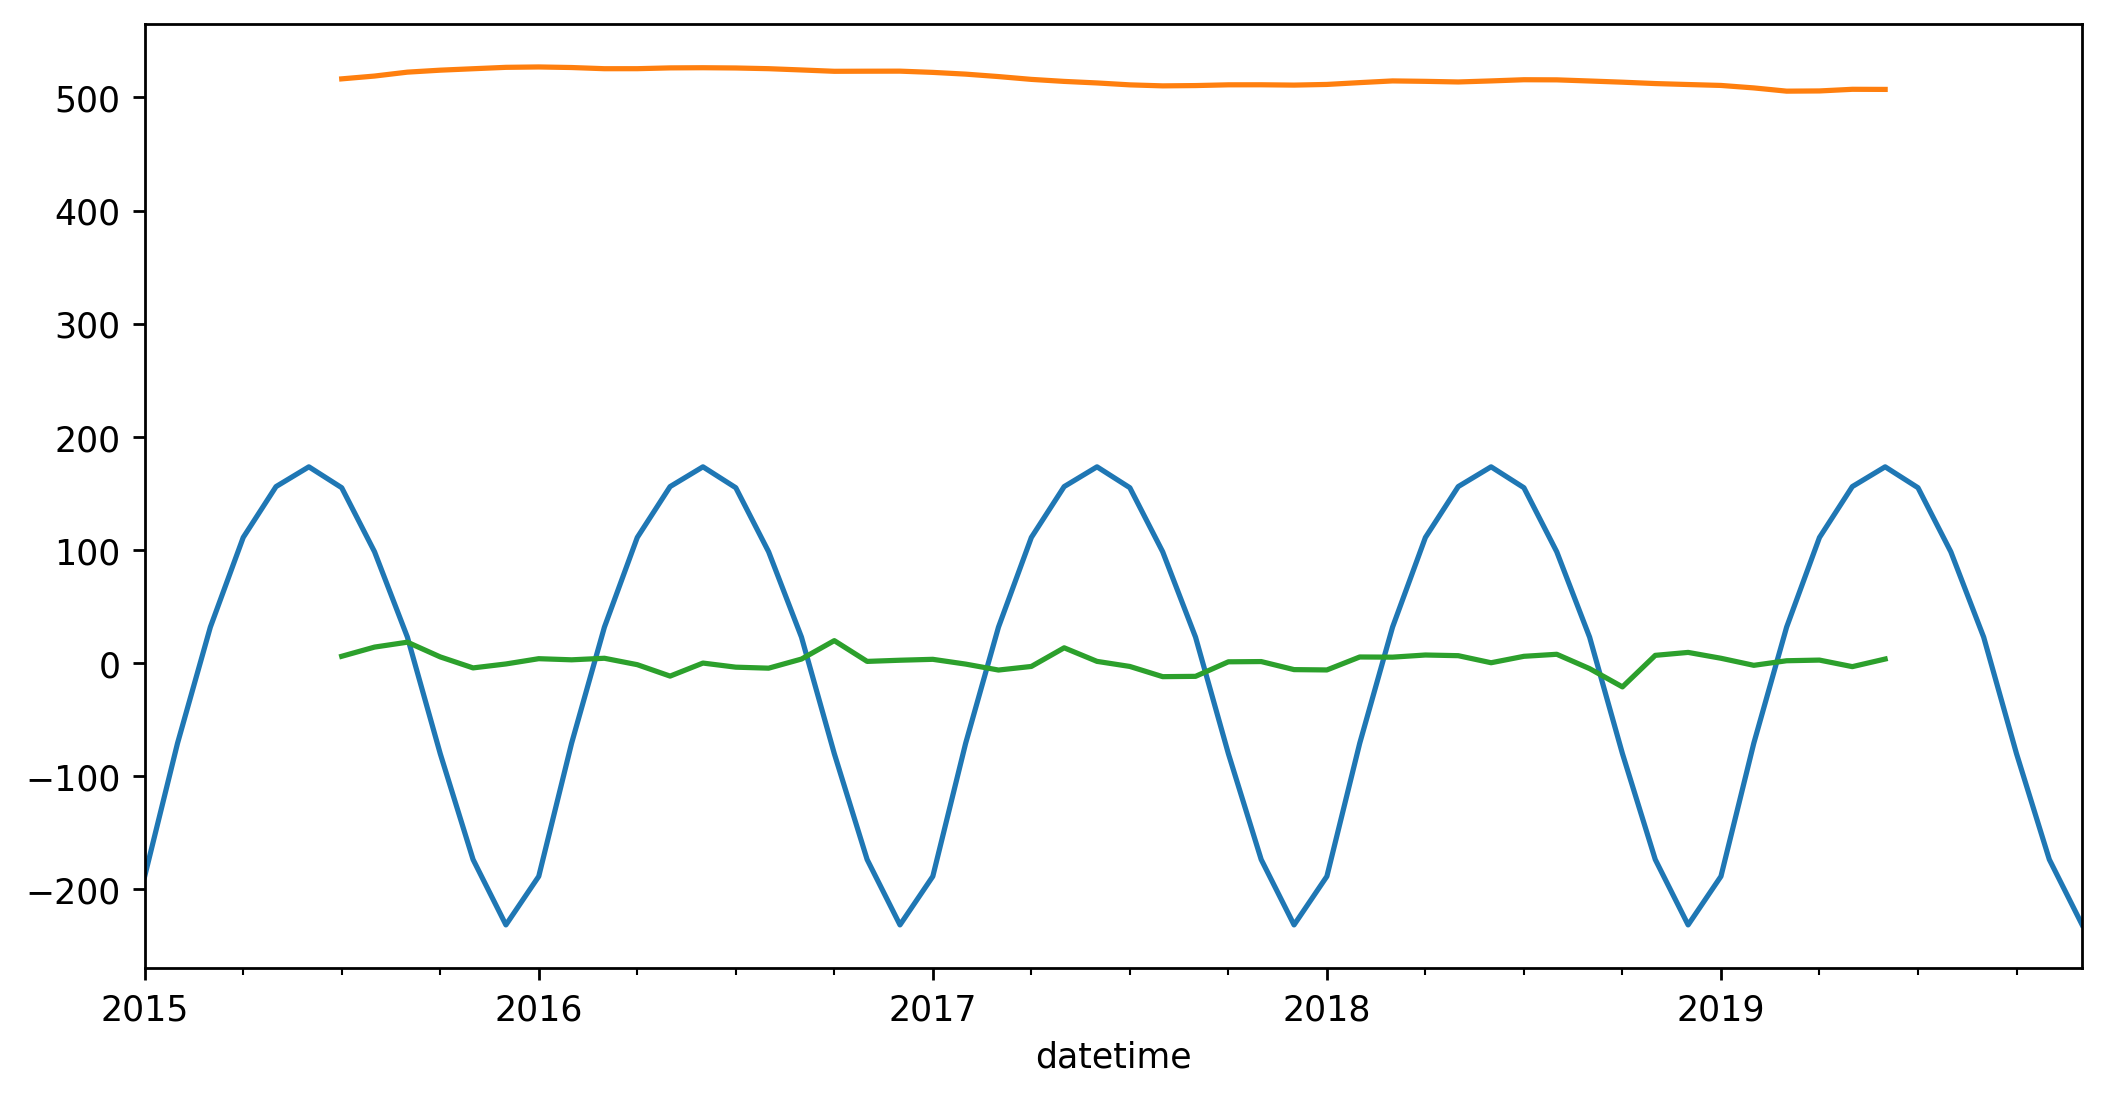

In [109]:
from statsmodels.tsa.seasonal import seasonal_decompose
#help(seasonal_decompose)


data_key = 'soil'
resample_key = 'MS'
timeseries = dict_df[data_key][resample_key]['Power']
x = seasonal_decompose(timeseries)
help(x)
x.seasonal.plot()
x.trend.plot()
x.resid.plot()

In [ ]:
from statsmodels.tsa.seasonal.STL

In [ ]:
from statsmodels.tsa.

In [ ]:
help(statsmodels.tsa.seasonal.un)

In [80]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean 

In [142]:
timeseries.shape[0] // 24

1826

In [18]:
from scipy import fftpack


# Frequency and sampling rate
f = 10 # frequency
Fs = 100 # sampling rate
t = np.arange(0,1,1/Fs)# Sine function
y = np.sin(2 * np.pi * f * t)# Perform Fourier transform using scipy

y_fft = fftpack.fft(y)# Plot data
n = np.size(t)
fr = Fs/2 * np.linspace(0,1,n/2)
y_m = 2/n * abs(y_fft[0:np.size(fr)])
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax[0].plot(t, y)    # plot time series
ax[1].stem(fr, y_m) # plot freq domain


frequencies = np.fft.fftfreq(dict_df['soil']['H']['Power'].shape[0], d=1.0)
print(frequencies)


[ 0.00000000e+00  2.28185469e-05  4.56370938e-05 ... -6.84556407e-05
 -4.56370938e-05 -2.28185469e-05]


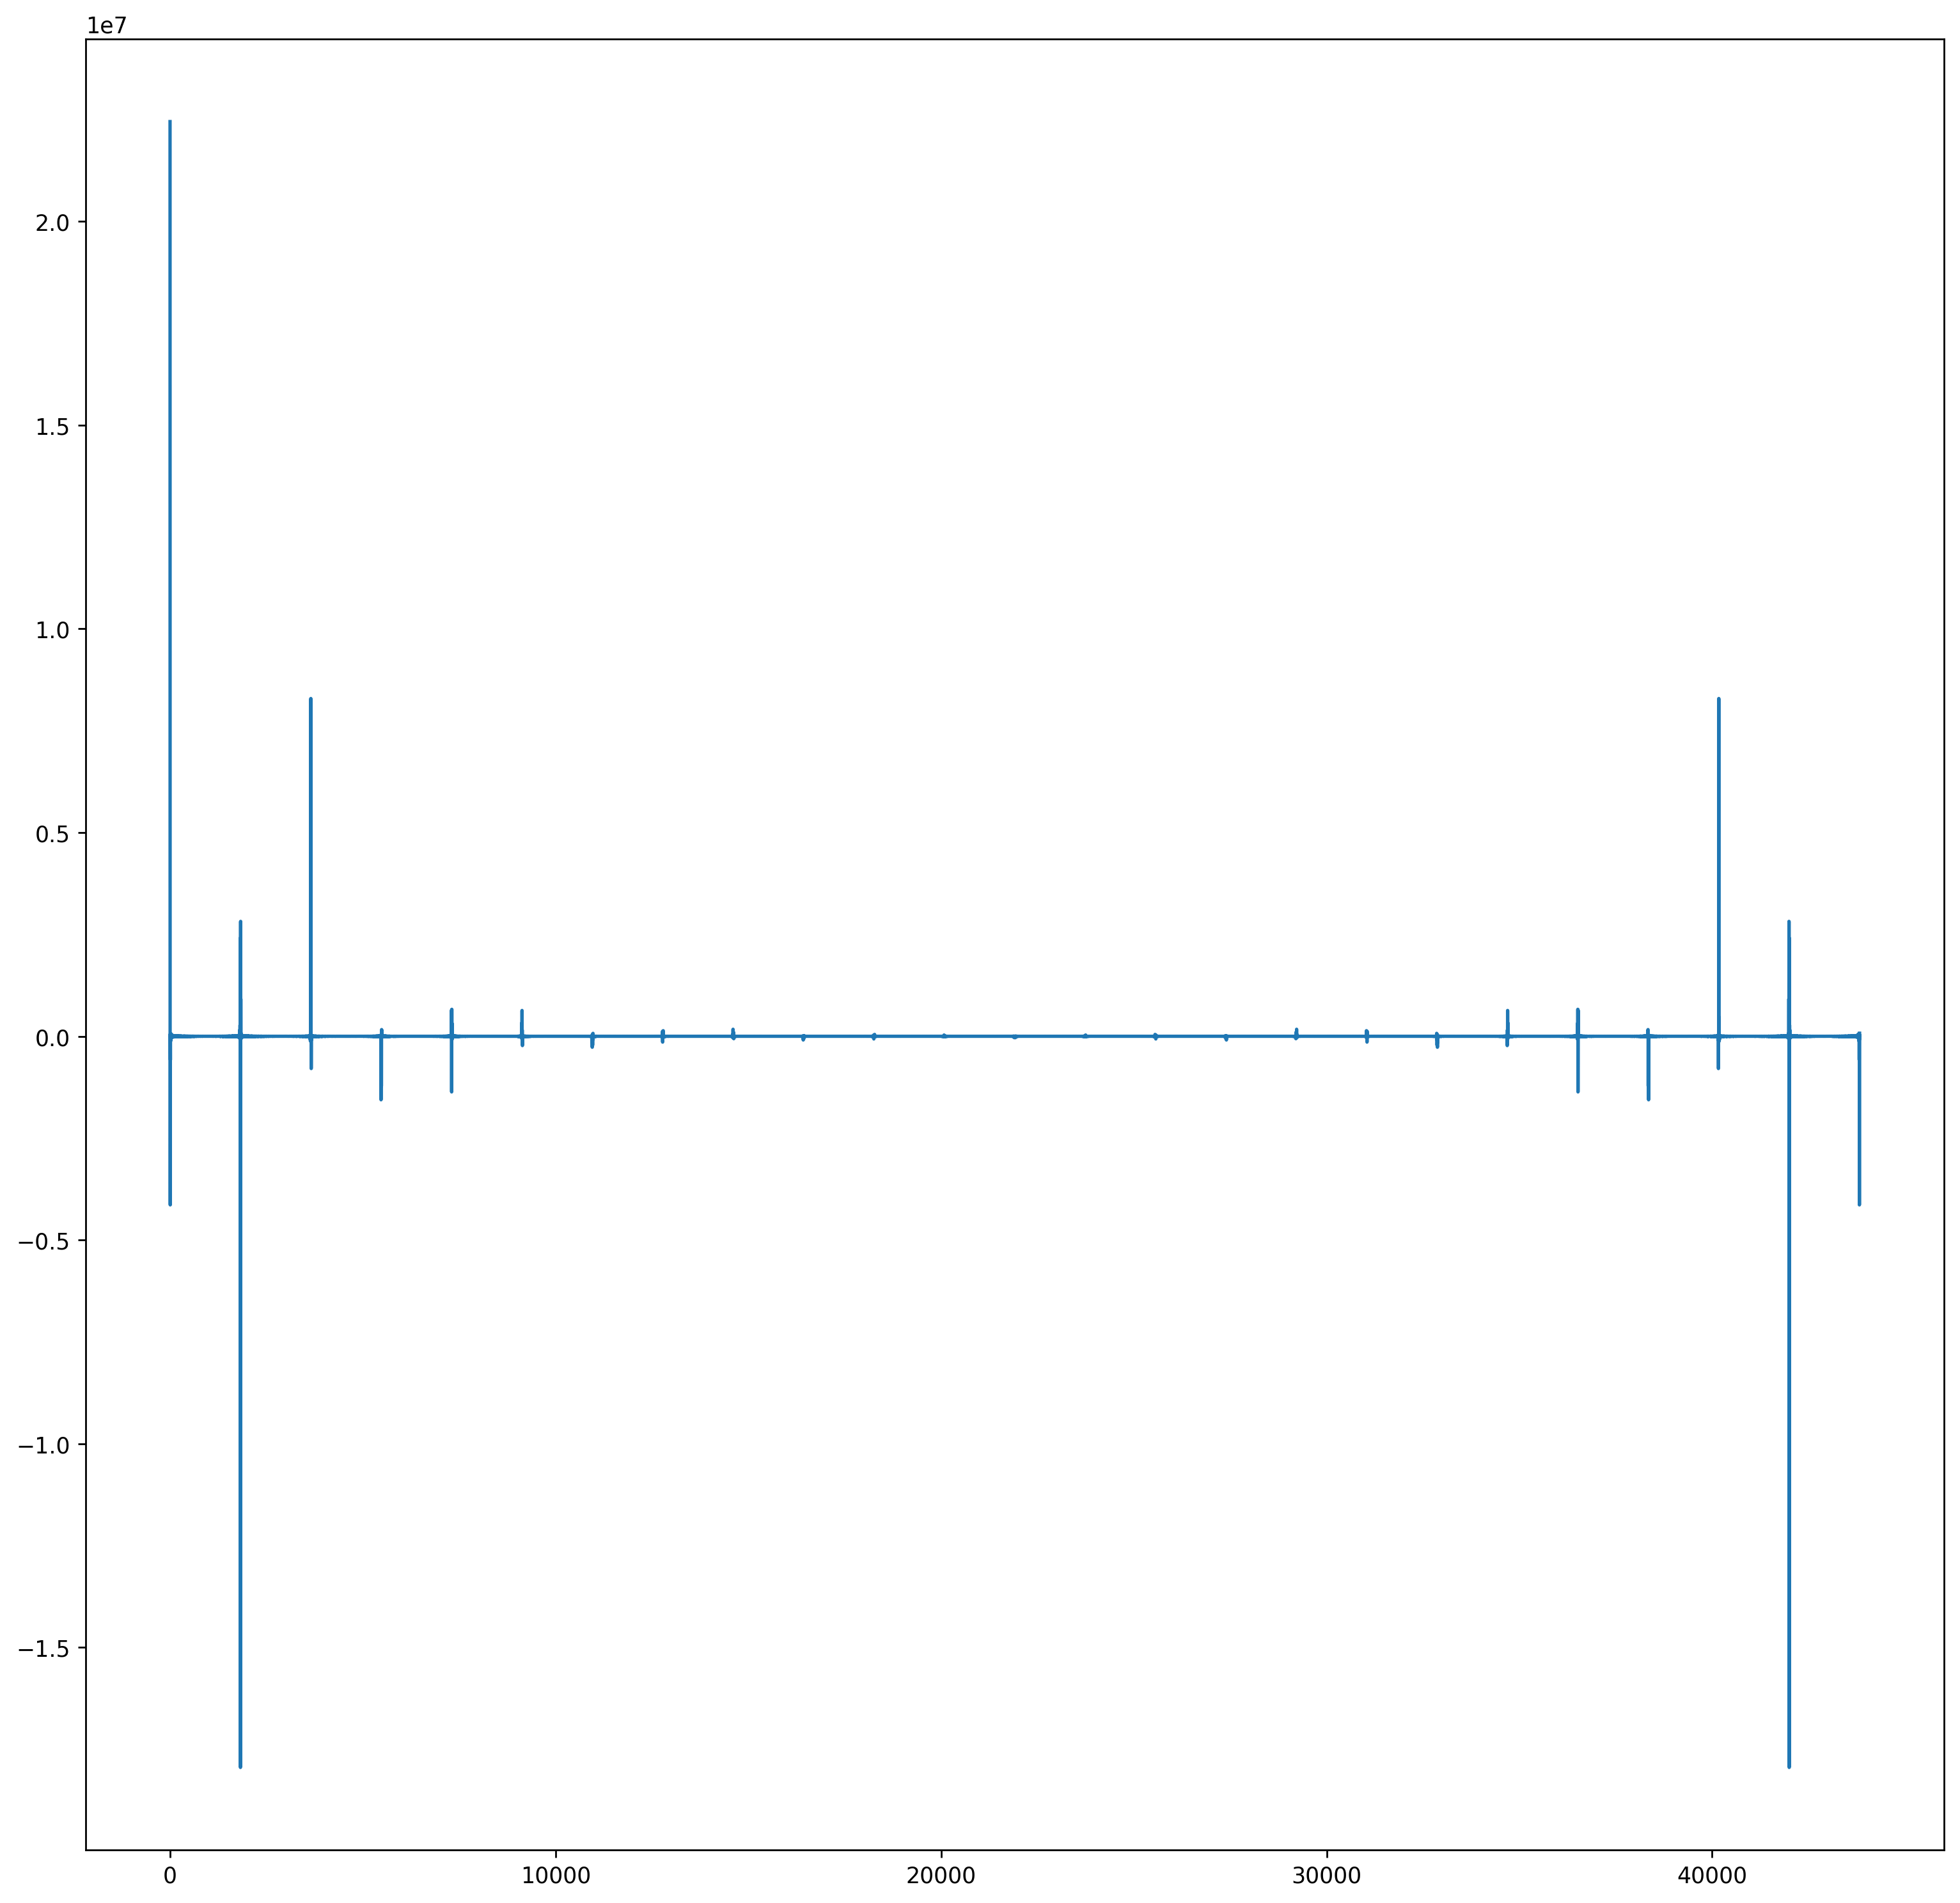

In [15]:
plt.plot(np.real(np.fft.fft(dict_df['soil']['H']['Power'])))
plt.show()

In [ ]:
dict_df['basic']['minute'].head(5)

In [ ]:
dict_df['soil']['minute'].head(5)

In [ ]:
dict_df['weather']['minute'].head(5)

In [ ]:
dict_df['soil_weather']['minute'].head(5)

## Reduce dataset size by averaging over time-periods

In [ ]:
for data_key in list_data_keys:
    for timewindow_key in list_data_timewindow_keys:
        dict_df[data_key][timewindow_key] = calculate_sma_and_reduce_size(dict_df[data_key]['minute'], dict_min_per[timewindow_key])

In [ ]:
plot_all_features(dict_df['soil_weather']['hour'])

## Auto-correlation for reduced datasets

In [ ]:
def plot_autocorrelation_comparison_wo_showing(data_key_01, data_key_02, timewindow_key, ax, tmax = -1):
    pd.plotting.autocorrelation_plot(dict_df[data_key_01][timewindow_key]['Power'], ax = ax, label = data_key_01)
    pd.plotting.autocorrelation_plot(dict_df[data_key_02][timewindow_key]['Power'], ax = ax, label = data_key_02)
    ax.set_xlabel('lag [{:s}]'.format(timewindow_key))
    ax.set_ylabel('autocorrelation')
    if (tmax != -1): ax.set_xlim([0, tmax])
    return None

In [ ]:
fig, axarr = plt.subplots(7, 1)

plot_autocorrelation_comparison_wo_showing('basic', 'soil', 'year', axarr[0])
plot_autocorrelation_comparison_wo_showing('basic', 'soil', 'month', axarr[1])
plot_autocorrelation_comparison_wo_showing('basic', 'soil', 'week', axarr[2])
plot_autocorrelation_comparison_wo_showing('basic', 'soil', 'day', axarr[3])
plot_autocorrelation_comparison_wo_showing('basic', 'soil', 'day', axarr[4], tmax = 31)
plot_autocorrelation_comparison_wo_showing('basic', 'soil', 'hour', axarr[5])
plot_autocorrelation_comparison_wo_showing('basic', 'soil', 'hour', axarr[6], tmax = int(24 * 31))

plt.tight_layout()
plt.show()

In [ ]:
fig, axarr = plt.subplots(7, 1)

plot_autocorrelation_comparison_wo_showing('basic', 'weather', 'year', axarr[0])
plot_autocorrelation_comparison_wo_showing('basic', 'weather', 'month', axarr[1])
plot_autocorrelation_comparison_wo_showing('basic', 'weather', 'week', axarr[2])
plot_autocorrelation_comparison_wo_showing('basic', 'weather', 'day', axarr[3])
plot_autocorrelation_comparison_wo_showing('basic', 'weather', 'day', axarr[4], tmax = 31)
plot_autocorrelation_comparison_wo_showing('basic', 'weather', 'hour', axarr[5])
plot_autocorrelation_comparison_wo_showing('basic', 'weather', 'hour', axarr[6], tmax = int(24 * 31))

plt.tight_layout()
plt.show()

In [ ]:
fig, axarr = plt.subplots(7, 1)

plot_autocorrelation_comparison_wo_showing('basic', 'soil_weather', 'year', axarr[0])
plot_autocorrelation_comparison_wo_showing('basic', 'soil_weather', 'month', axarr[1])
plot_autocorrelation_comparison_wo_showing('basic', 'soil_weather', 'week', axarr[2])
plot_autocorrelation_comparison_wo_showing('basic', 'soil_weather', 'day', axarr[3])
plot_autocorrelation_comparison_wo_showing('basic', 'soil_weather', 'day', axarr[4], tmax = 31)
plot_autocorrelation_comparison_wo_showing('basic', 'soil_weather', 'hour', axarr[5])
plot_autocorrelation_comparison_wo_showing('basic', 'soil_weather', 'hour', axarr[6], tmax = int(24 * 31))

plt.tight_layout()
plt.show()

## SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
def train_sarima_model(data_training, order_arima, order_seasonal):
    model_sarima = SARIMAX(data_training, order=order_arima, seasonal_order=order_seasonal)
    return model_sarima.fit()

In [ ]:
weeks_per_year = 52
datarange_total_years = 5
datarange_training_years = 3
datarange_predict_years = datarange_total_years - datarange_training_years

In [ ]:
order_arima = (1, 1, 1) 
order_seasonal = (1, 1, 1, weeks_per_year)

### Basic Dataset

In [ ]:
data_total = dict_df['basic']['week']['Power']
data_training = data_total[0:datarange_training_years * weeks_per_year]
model_sarima_fit = train_sarima_model(data_training, order_arima, order_seasonal)

In [ ]:
t_predict_start = datarange_training_years * weeks_per_year
t_predict_end = datarange_total_years * weeks_per_year
data_predicted = model_sarima_fit.predict(start = t_predict_start, end = t_predict_end) 
data_training_and_predicted = np.concatenate((data_training, data_predicted))

In [ ]:
plt.plot(data_training_and_predicted)
plt.plot(data_total)
plt.xlim([(datarange_training_years - 1) * weeks_per_year, datarange_total_years * weeks_per_year])
plt.show()

### Soil and Weather Dataset

In [ ]:
data_total = dict_df['soil_weather']['week']['Power']
data_training = data_total[0:datarange_training_years * weeks_per_year]
model_sarima_fit = train_sarima_model(data_training, order_arima, order_seasonal)

In [ ]:
t_predict_start = datarange_training_years * weeks_per_year
t_predict_end = datarange_total_years * weeks_per_year
data_predicted = model_sarima_fit.predict(start = t_predict_start, end = t_predict_end) 
data_training_and_predicted = np.concatenate((data_training, data_predicted))

In [ ]:
plt.plot(data_training_and_predicted)
plt.plot(data_total)
plt.xlim([(datarange_training_years - 1) * weeks_per_year, datarange_total_years * weeks_per_year])
plt.show()

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series. Must be used if x is not a pandas object or if
        the index of x does not have  a frequency. Overrides default
        periodicity of x if x is a pandas object with a timeseries index.
    two_sided : bool, optional
        The moving a

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = sm.tsa.stattools.adfuller(df_basic_avg_per_hour['Power'])